# Introduction

This project is for Capgemini in order to continue the selection process.

The first task is to work with a dataset that I can chose to make classification.

I've chosen here a dataset on kaggle :

https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

This dataset is about wine quality as Spain and France are both wine's countries.

# Load the dataset and import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
def load_dataset(name_data):

    wine_data = pd.read_csv(os.path.join("data", name_data))

    return wine_data

In [3]:
wine_data = load_dataset('WineQT.csv')

# Explore the dataset

In [4]:
wine_data.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


Okay so we can see the dataset's feature. The quality is the target here (between 0 to 10).

As an hypothesis, for me the alcohol, the sulphates and the sulfur dioxide are interesting to explore. We can see that between a 5 or a 7 quality wine, these parameters can change. Moreover, I supposed here that density, sugar, chlorides don't play a bigger role. Of course this as to be verified

In [5]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


This dataset doesn't contain any categorical features. But if it does, I would have had to convert them (with one hot encoding for example).

In [6]:
wine_data.describe

<bound method NDFrame.describe of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.0

In [7]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

I'm lucky there is no missing values. But if there is, I can replace them by a representative value according to the quality

## Some visualisation

In [8]:
def univariate_analysis(feature):

    plt.figure(figsize=(6,6))
    sns.histplot(wine_data[feature], kde = 20)
    plt.title(str(feature) + 'distribution')
    plt.xlabel(feature)
    plt.ylabel('Number of wine')
    plt.show

    print("Some statistics\n")

    stats = wine_data[feature].describe()
    print(stats)

    plt.figure(figsize=(5,5))
    sns.boxplot(x=wine_data[feature])
    plt.title('Box diagram')
    plt.show()

Some statistics

count    1143.000000
mean       10.442111
std         1.082196
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64


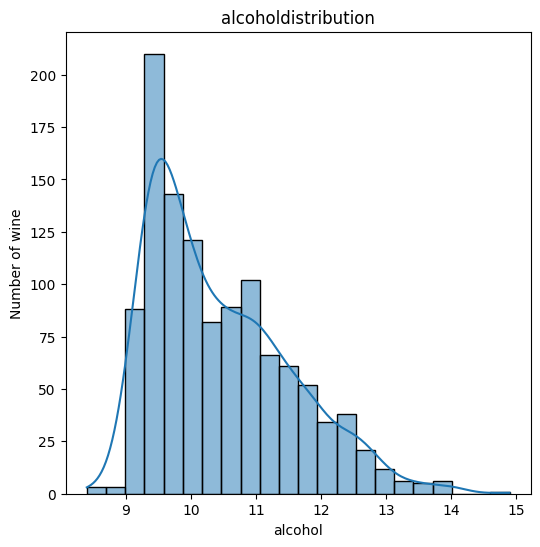

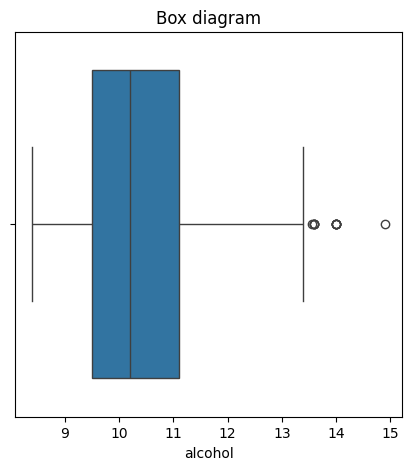

In [9]:
univariate_analysis('alcohol')

Okay some wine are strongs but nothing really strange

Some statistics

count    1143.000000
mean        5.657043
std         0.805824
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64


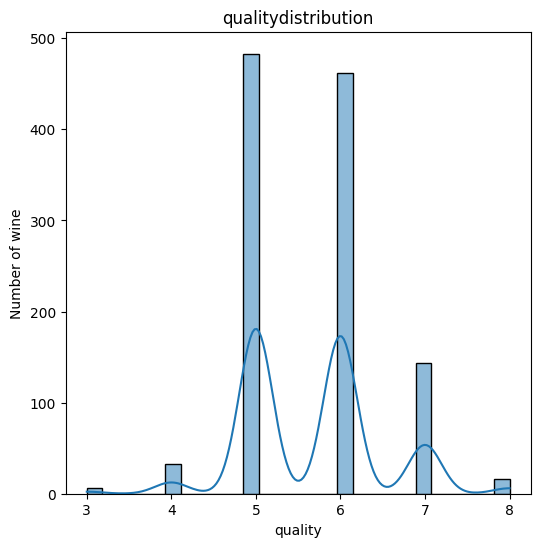

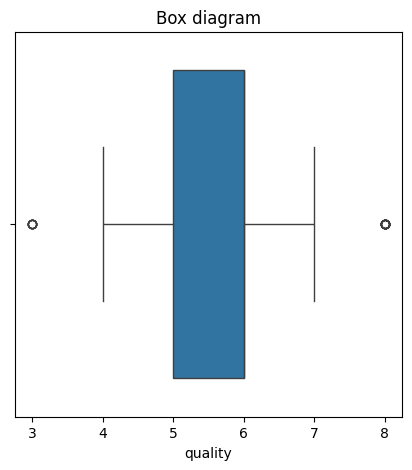

In [10]:
univariate_analysis('quality')

There is a way more mid wine that bad or good one, let's see how we will do later

Some statistics

count    1143.000000
mean        0.657708
std         0.170399
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64


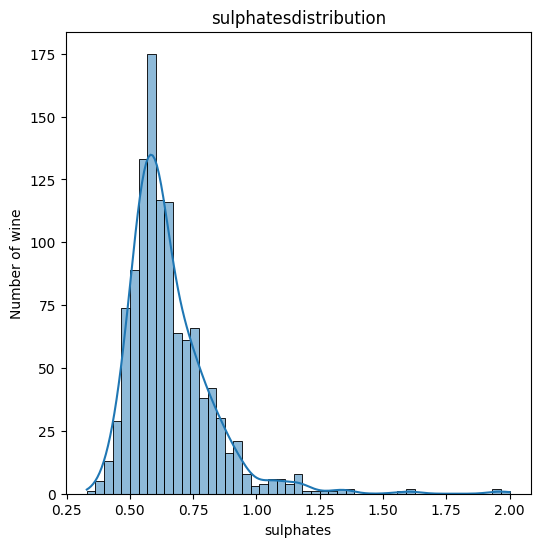

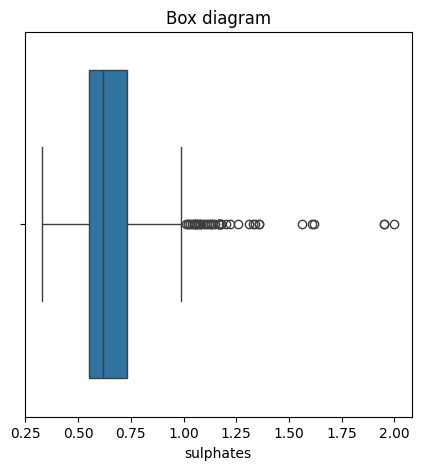

In [11]:
univariate_analysis('sulphates')

Some statistics

count    1143.000000
mean        3.311015
std         0.156664
min         2.740000
25%         3.205000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64


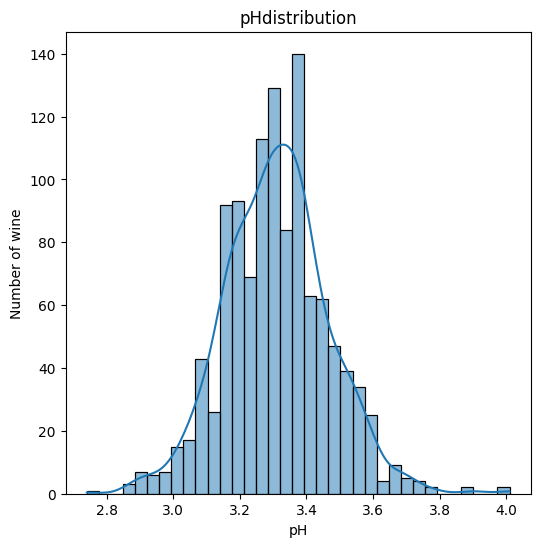

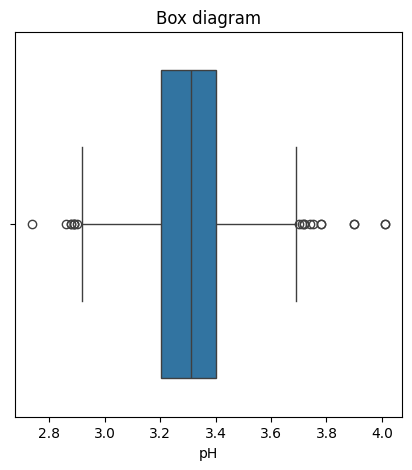

In [12]:
univariate_analysis('pH')

Some statistics

count    1143.000000
mean       45.914698
std        32.782130
min         6.000000
25%        21.000000
50%        37.000000
75%        61.000000
max       289.000000
Name: total sulfur dioxide, dtype: float64


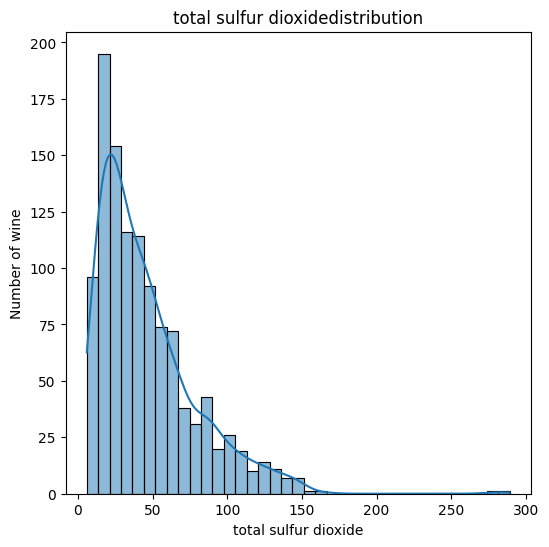

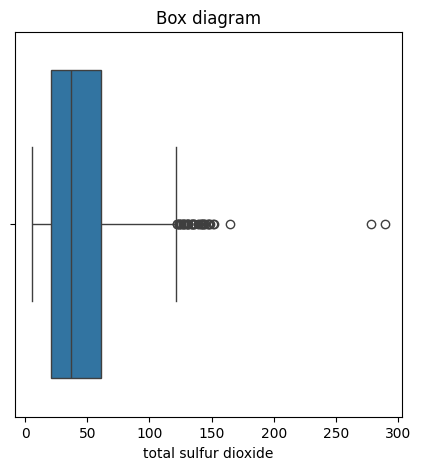

In [13]:
univariate_analysis('total sulfur dioxide')

Some statistics

count    1143.000000
mean       15.615486
std        10.250486
min         1.000000
25%         7.000000
50%        13.000000
75%        21.000000
max        68.000000
Name: free sulfur dioxide, dtype: float64


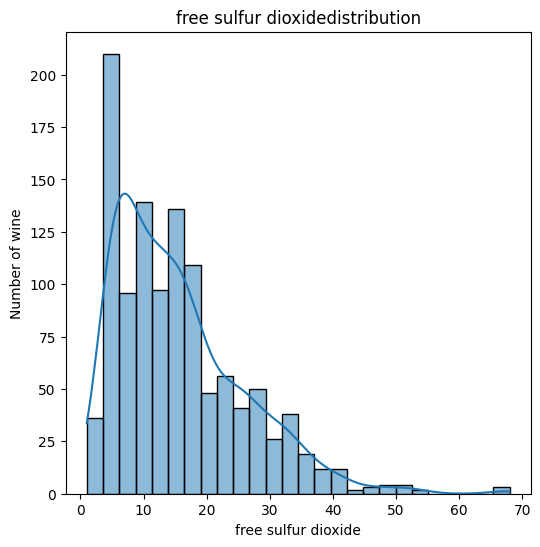

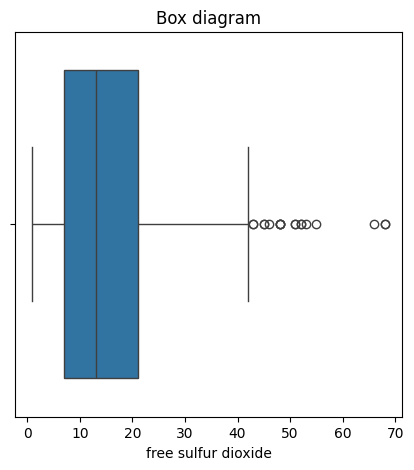

In [14]:
univariate_analysis('free sulfur dioxide')

In [15]:
wine_data = wine_data.drop(columns=['Id'])

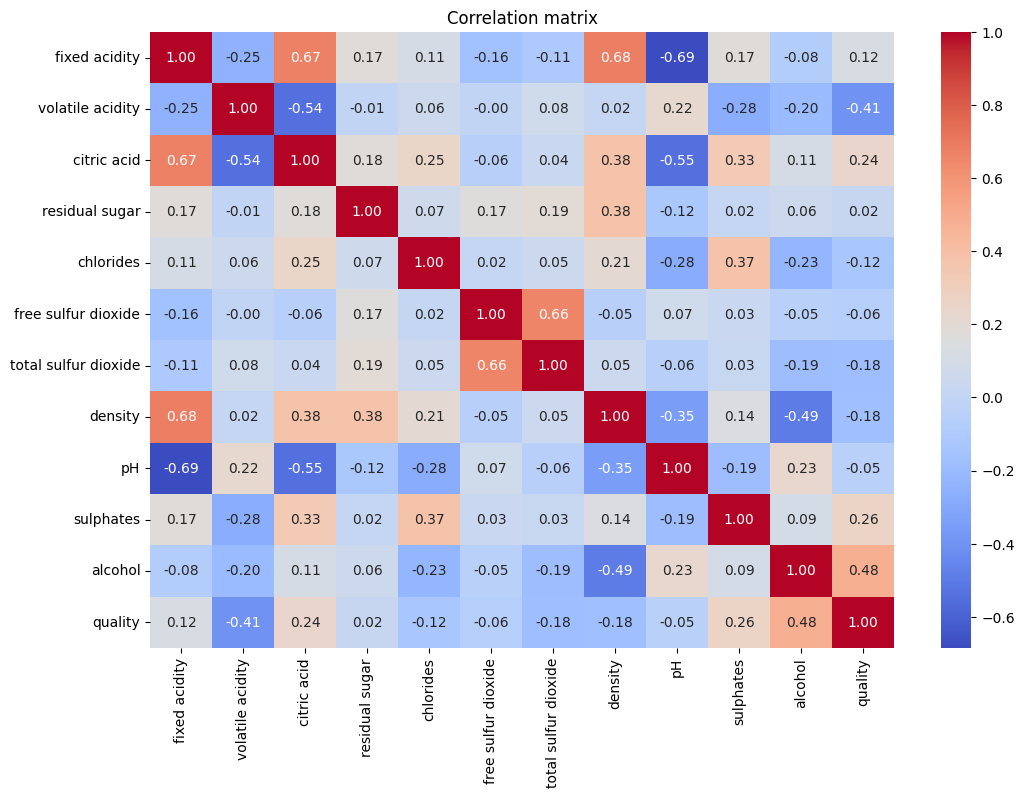

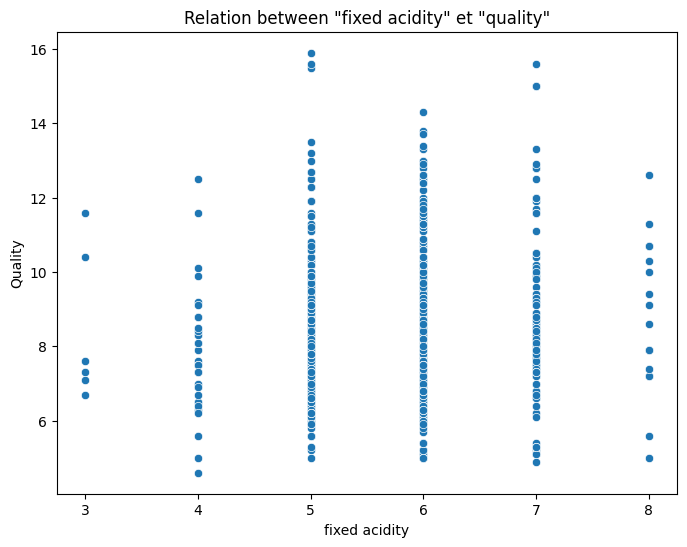

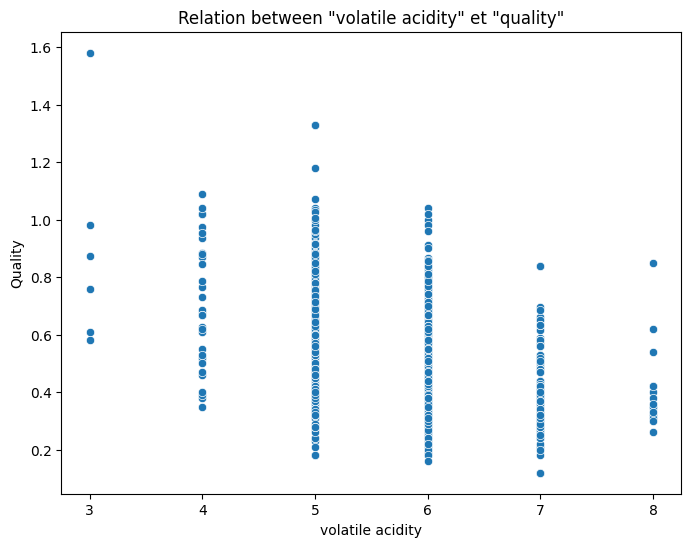

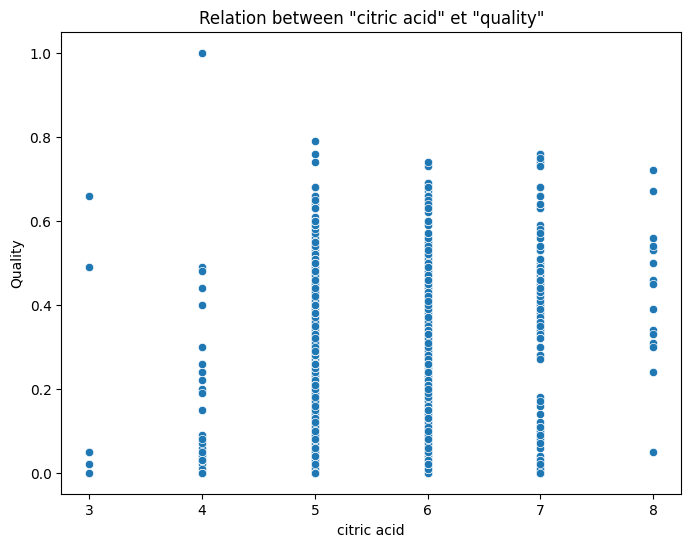

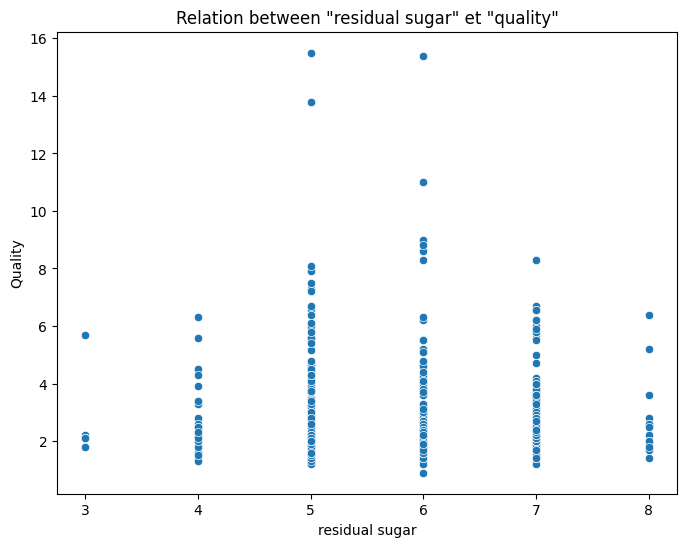

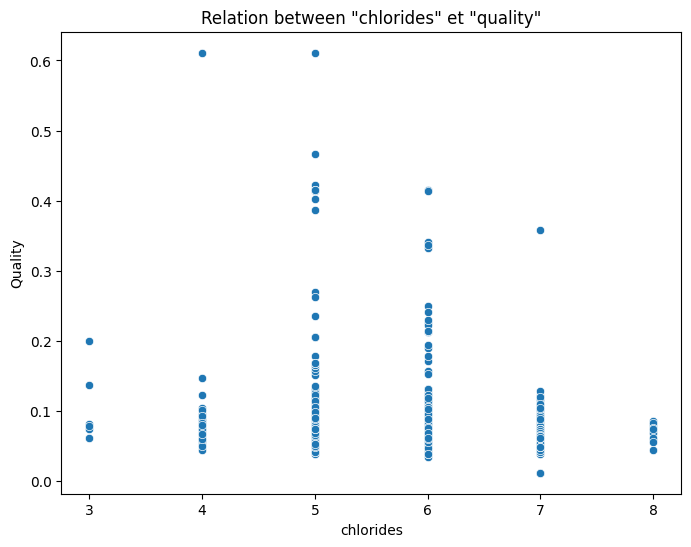

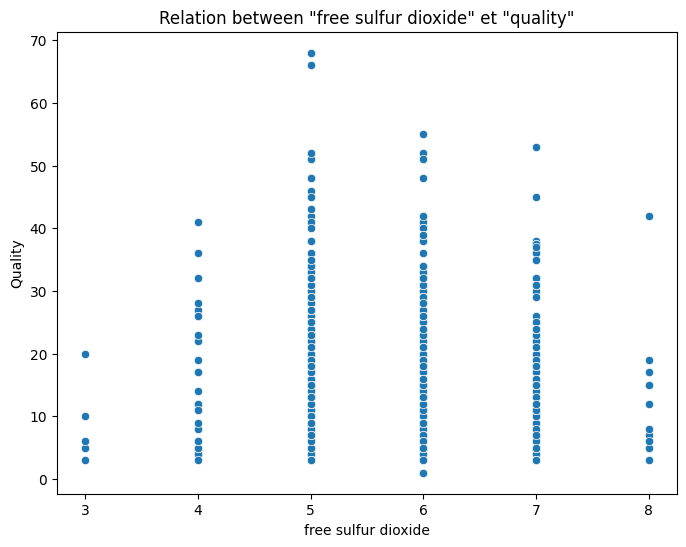

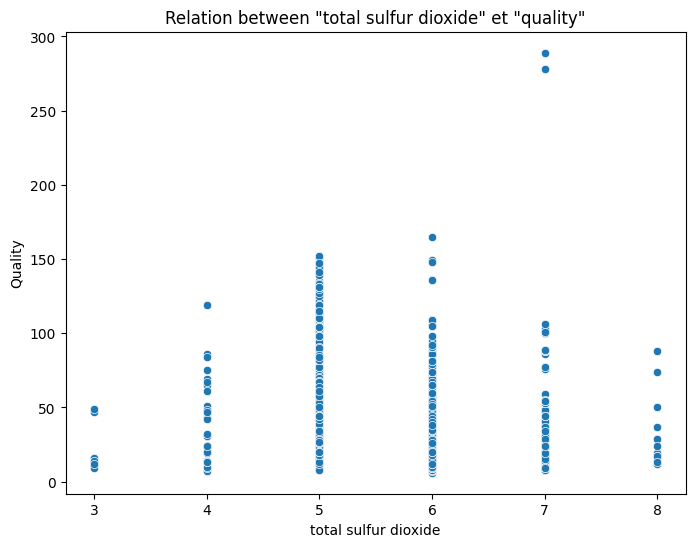

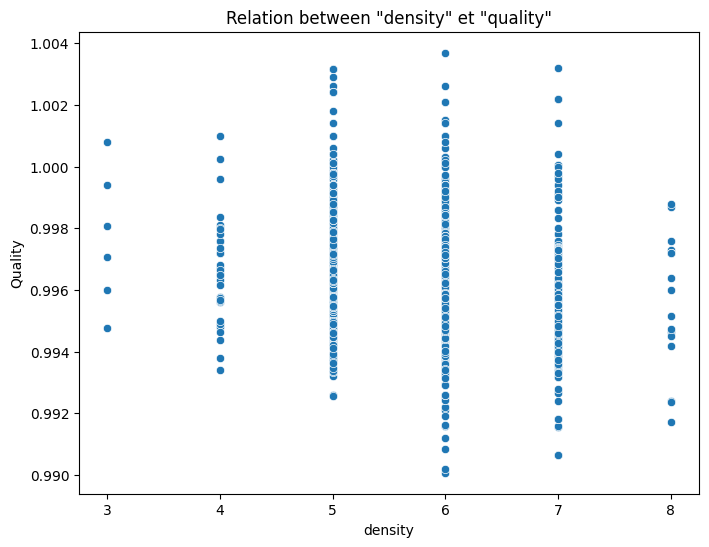

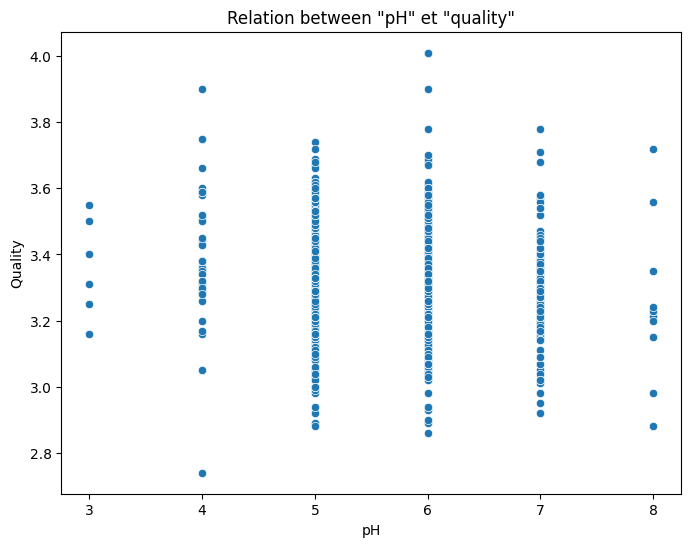

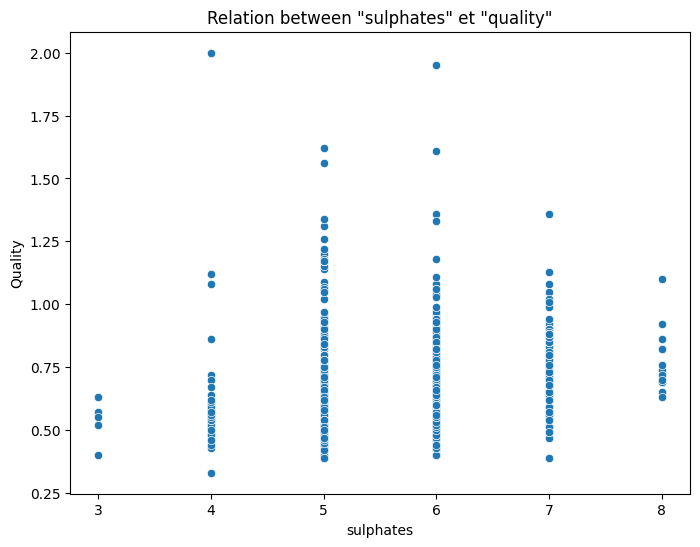

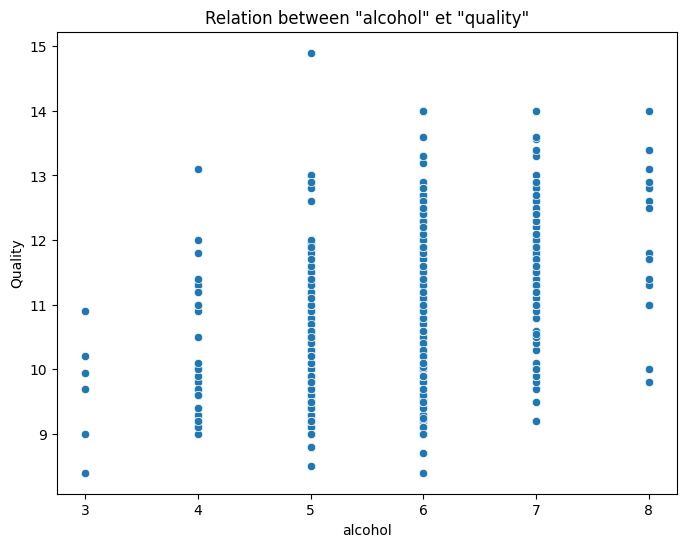

In [16]:
import seaborn as sns

# I check the correlation_matrix
correlation_matrix = wine_data.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix")
plt.show()

# Plot graph
for column in wine_data.columns:
    if column != 'quality':
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x='quality', y=column, data=wine_data)
        plt.title(f'Relation between "{column}" et "quality"')
        plt.xlabel(column)
        plt.ylabel('Quality')
        plt.show()


Here I checked the relation between quality and all of the features because they're not that many

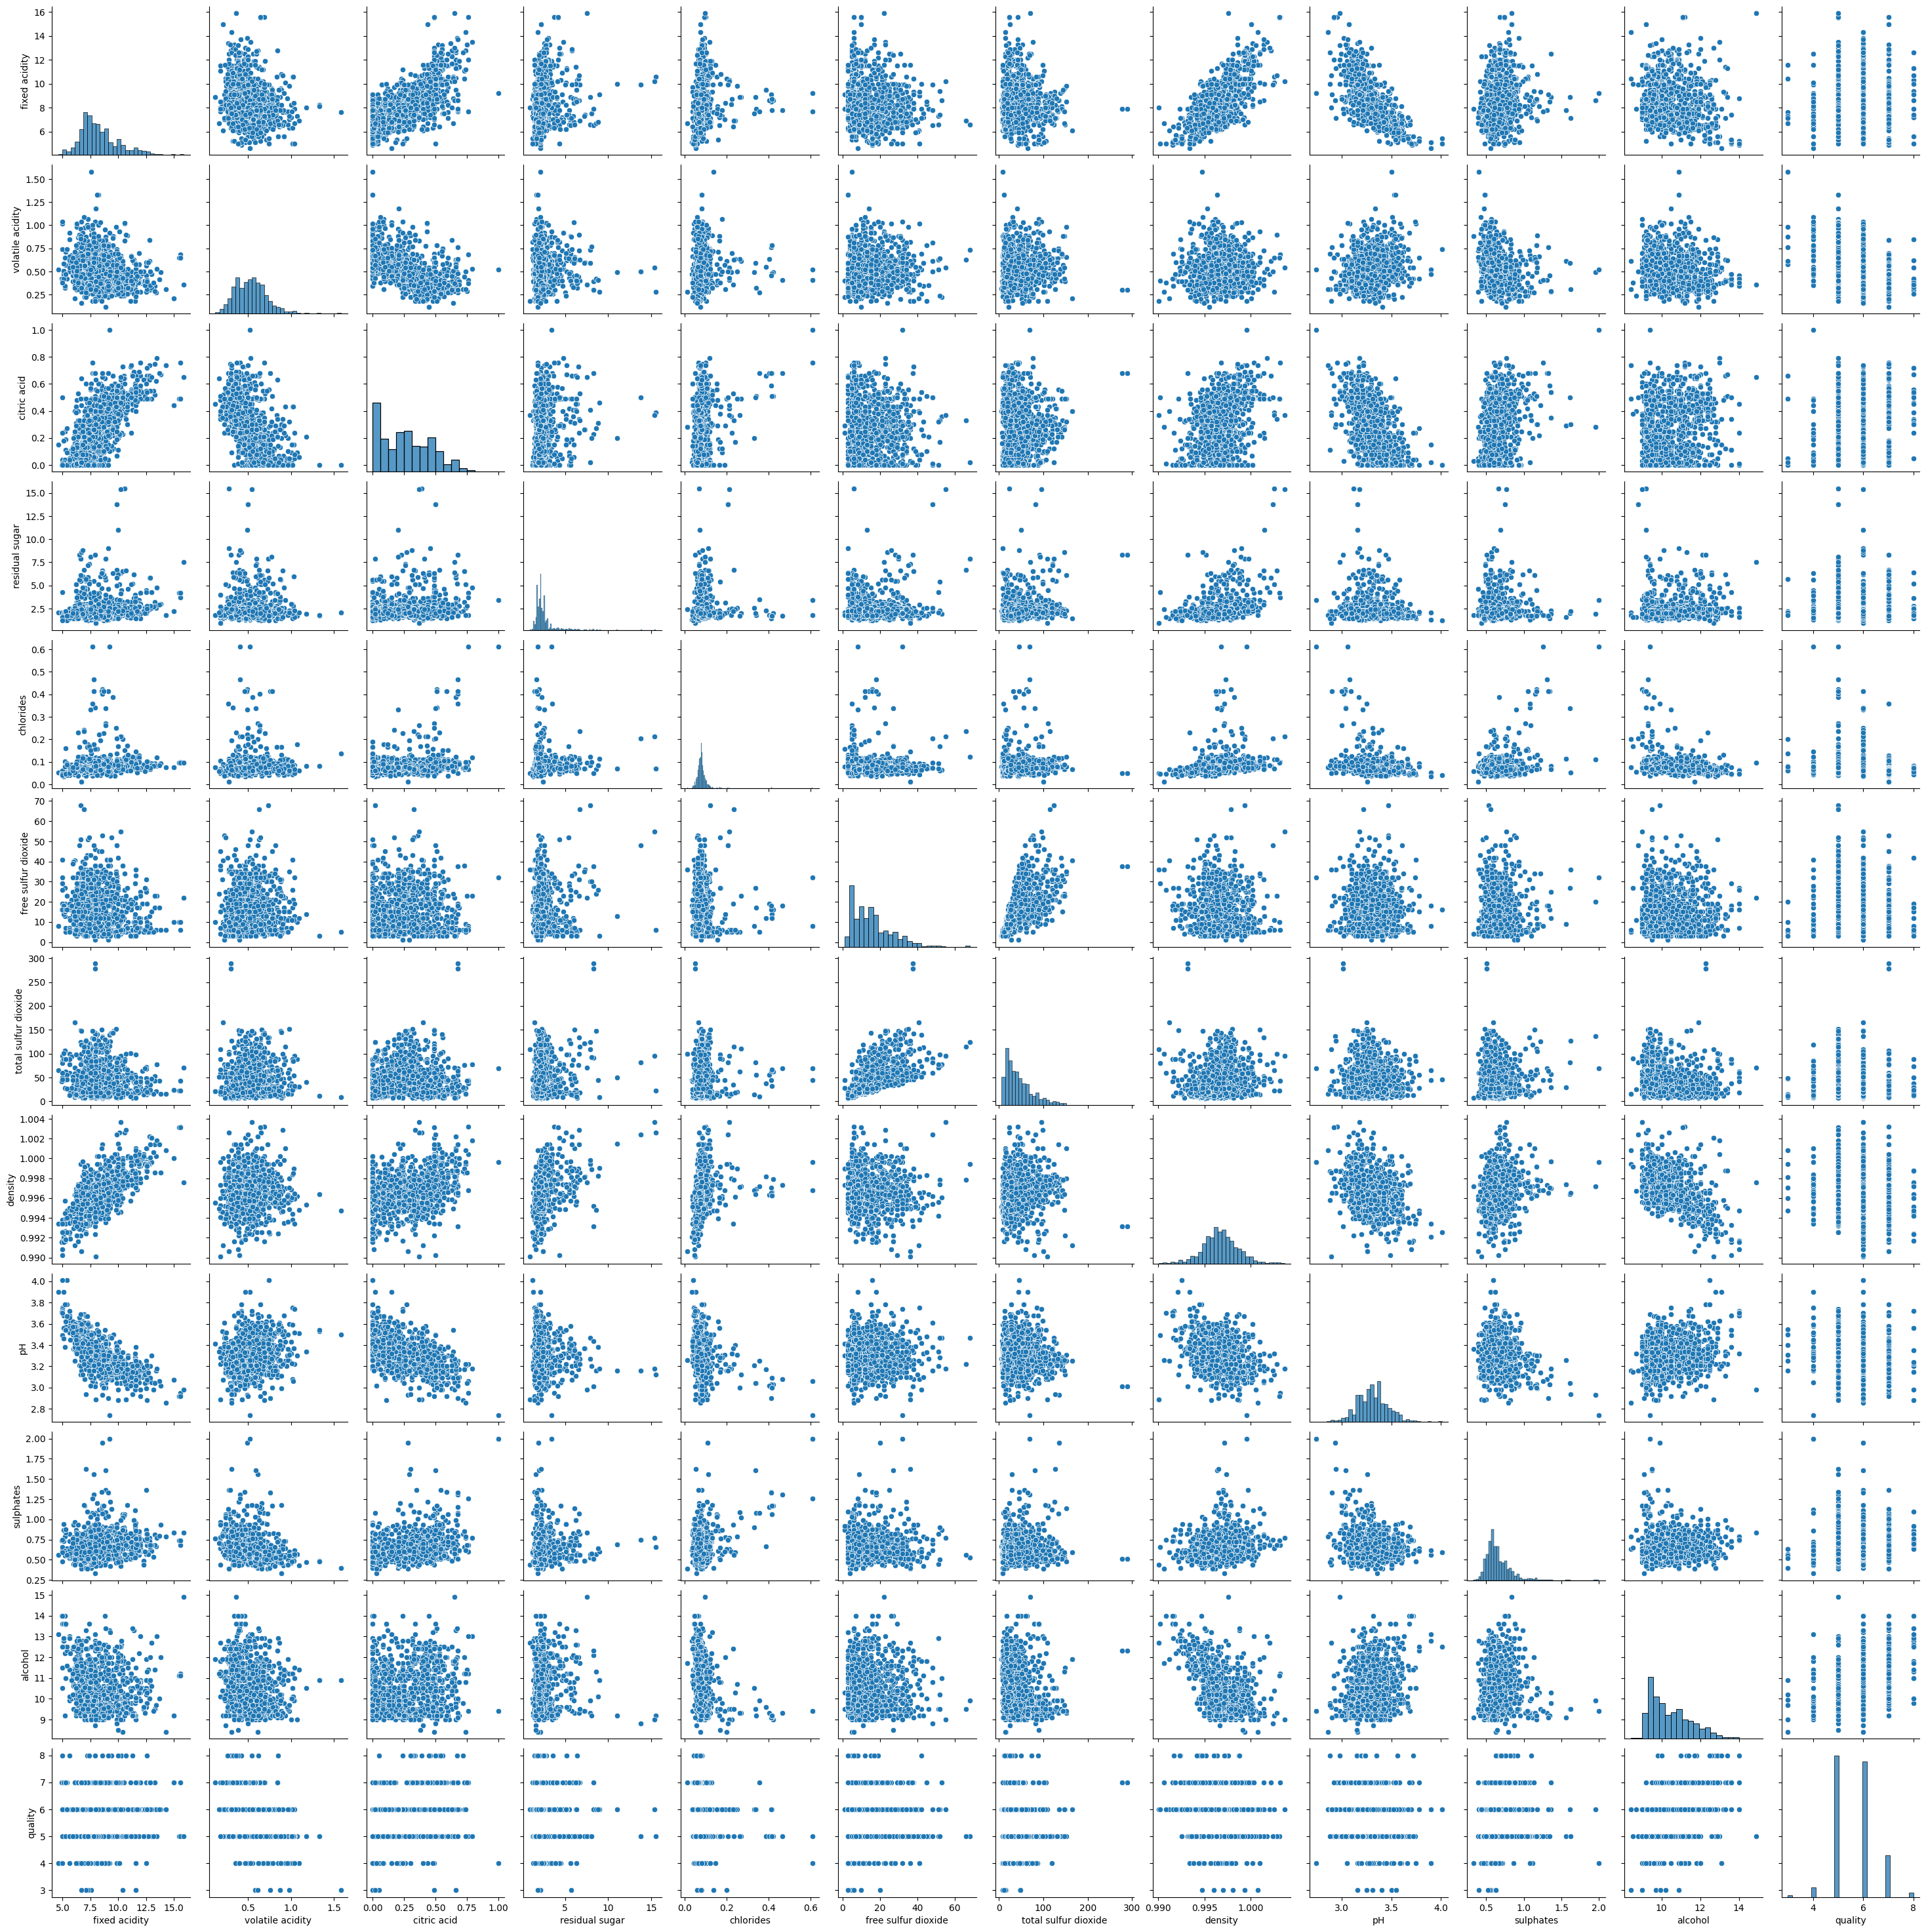

In [17]:
# Pairplot
sns.pairplot(wine_data)
plt.show()

Just by curiosity I've plotted all of these graphics

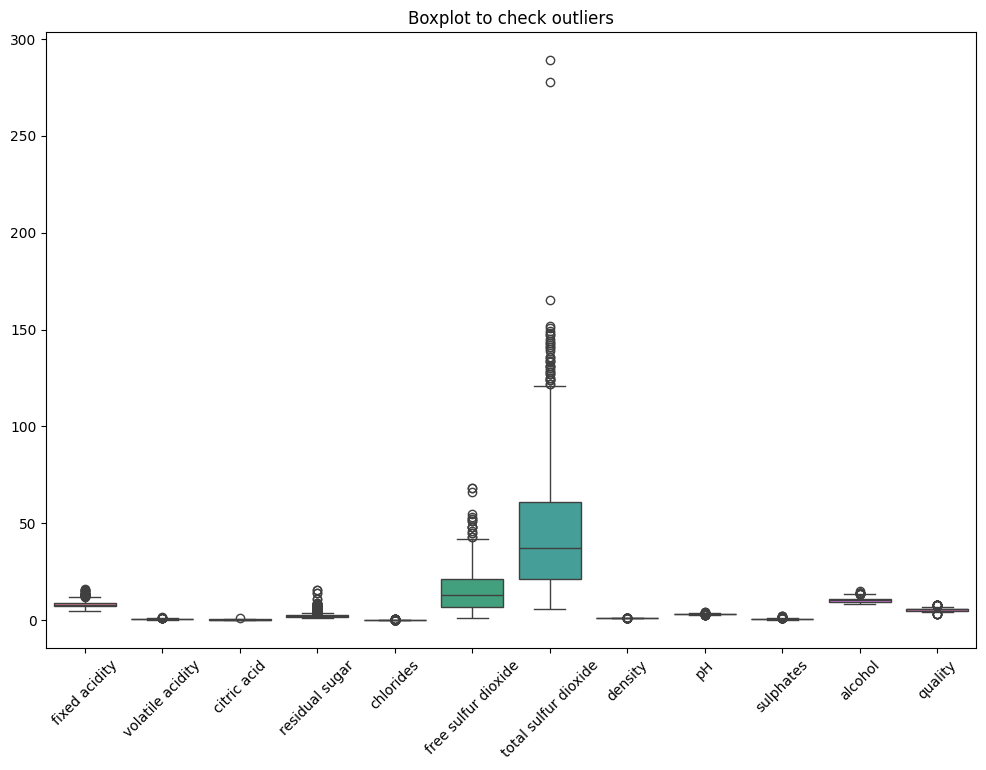

In [18]:
#Boxplot to see the outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=wine_data)
plt.title('Boxplot to check outliers')
plt.xticks(rotation=45)
plt.show()

It looks like there is outliers in the datas

# Split in train and test

In [19]:
from sklearn.model_selection import train_test_split

wine_data_feature = wine_data.drop('quality', axis=1)
wine_data_label = wine_data['quality']

In [20]:
wine_data_feature.shape

(1143, 11)

In [21]:
wine_data_train, wine_data_test, wine_data_train_label, wine_data_test_label = train_test_split(wine_data_feature, wine_data_label, test_size=0.1, stratify=wine_data_label, random_state=42)

In [22]:
print("Train size:", wine_data_train.shape[0])
print("Test size:", wine_data_test.shape[0])

Train size: 1028
Test size: 115


In [23]:
# Check if categories are well distributed in the train set and test set

distribution_train = wine_data_train_label.value_counts(normalize=True)

distribution_test = wine_data_test_label.value_counts(normalize=True)


print("Distribution in train set:\n", distribution_train)
print("\nDistribution in test set :\n", distribution_test)


Distribution in train set:
 quality
5    0.422179
6    0.404669
7    0.125486
4    0.029183
8    0.013619
3    0.004864
Name: proportion, dtype: float64

Distribution in test set :
 quality
5    0.426087
6    0.400000
7    0.121739
4    0.026087
8    0.017391
3    0.008696
Name: proportion, dtype: float64


Knowing the quantity of very bad and very good wine, the distribution between test and train is good

# Pipeline for model

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

In [25]:
class ReplaceOutliers(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.lower_bounds = X.quantile(0.25) - 1.25 * (X.quantile(0.75) - X.quantile(0.25))
        self.upper_bounds = X.quantile(0.75) + 1.25 * (X.quantile(0.75) - X.quantile(0.25))
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        for column in X_copy.columns:
            lower_bound = self.lower_bounds[column]
            upper_bound = self.upper_bounds[column]
            X_copy[column] = X_copy[column].clip(lower=lower_bound, upper=upper_bound)
        return X_copy

In [26]:
wine_data_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
40,7.8,0.590,0.18,2.30,0.076,17.0,54.0,0.99750,3.43,0.59,10.0
389,9.1,0.470,0.49,2.60,0.094,38.0,106.0,0.99820,3.08,0.59,9.1
558,8.3,0.430,0.30,3.40,0.079,7.0,34.0,0.99788,3.36,0.61,10.5
309,7.0,0.620,0.18,1.50,0.062,7.0,50.0,0.99510,3.08,0.60,9.3
25,7.8,0.645,0.00,5.50,0.086,5.0,18.0,0.99860,3.40,0.55,9.6
...,...,...,...,...,...,...,...,...,...,...,...
238,8.9,0.430,0.45,1.90,0.052,6.0,16.0,0.99480,3.35,0.70,12.5
1136,6.3,0.550,0.15,1.80,0.077,26.0,35.0,0.99314,3.32,0.82,11.6
668,8.3,0.280,0.48,2.10,0.093,6.0,12.0,0.99408,3.26,0.62,12.4
654,8.6,0.220,0.36,1.90,0.064,53.0,77.0,0.99604,3.47,0.87,11.0


In [27]:
#Prepare datas

from sklearn.neighbors import KNeighborsClassifier

wine_data_train_prepared = wine_data_train.copy()

preparation_pipeline = Pipeline([
    # ('outlier_replacer', ReplaceOutliers()),
    ('scaler', StandardScaler())
])

# Apply the pipeline
preparation_pipeline.fit(wine_data_train_prepared, wine_data_train_label)
wine_data_train_prepared = preparation_pipeline.transform(wine_data_train_prepared)

Every models that I've tried here overfit or perform bad, so I've decided to let them for this technical test. In real life, I would have tried more options, maybe deep learning too.

# Try decision tree

Best parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'max_depth': 20, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_samples_leaf': 5, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.1}
Accuracy of the model 0.5720293630120767
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        30
           5       0.62      0.60      0.61       434
           6       0.51      0.62      0.56       416
           7       0.49      0.39      0.43       129
           8       0.00      0.00      0.00        14

    accuracy                           0.56      1028
   macro avg       0.27      0.27      0.27      1028
weighted avg       0.53      0.56      0.54      1028



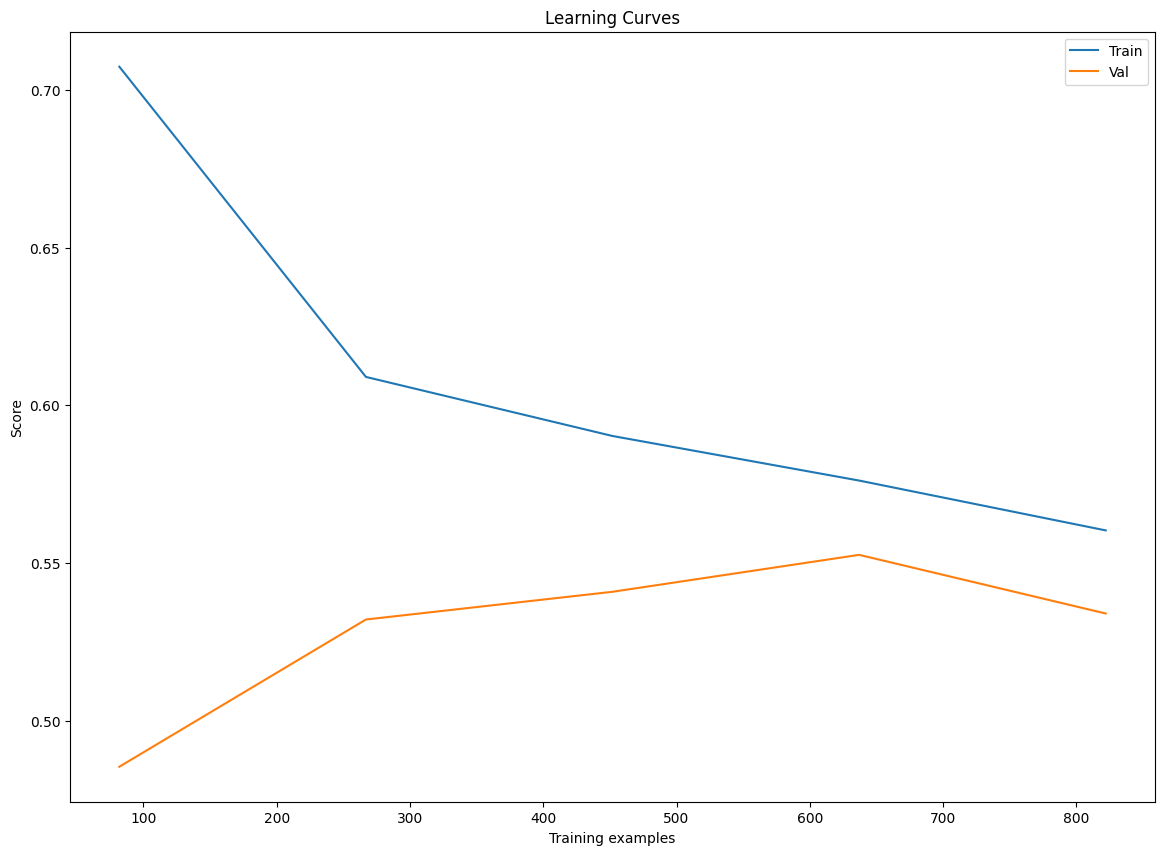

In [28]:
from sklearn.model_selection import GridSearchCV, learning_curve
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

param_grid_dt = {
    'max_depth': [None, 10, 20, 50],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 5],
    'max_features': ['sqrt', 'log2'],
    'min_weight_fraction_leaf': [0.0, 0.1],
    'max_leaf_nodes': [None, 5, 10],
    'class_weight': [None, 'balanced'],
    'ccp_alpha': [0.0, 0.1]
}

# I do cross validation because I don't have that much datas
models = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='accuracy')

# Train model
models.fit(wine_data_train_prepared, wine_data_train_label)

# Print best parameters
print("Best parameters:", models.best_params_)

# Plot the score
print("Accuracy of the model", models.best_score_)

# Predict to have a full report
predictions = models.predict(wine_data_train_prepared)

# Report
report = classification_report(wine_data_train_label, predictions, zero_division=0.0)

# plot the report
print("Classification Report:\n", report)

# Learning curve
plt.figure(figsize=(14, 10))
train_sizes, train_scores, val_scores = learning_curve(models.best_estimator_, wine_data_train_prepared, wine_data_train_label, cv=5, n_jobs=-1)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = val_scores.mean(axis=1)
plt.plot(train_sizes, train_scores_mean, label = 'Train')
plt.plot(train_sizes, test_scores_mean, label = 'Val')

plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.show()

In [29]:
# Save this model
best_decision_tree = DecisionTreeClassifier(**models.best_params_)
best_decision_tree.fit(wine_data_train_prepared, wine_data_train_label)

DecisionTreeClassifier(max_depth=20, max_features='log2', min_samples_leaf=5,
                       min_samples_split=5, min_weight_fraction_leaf=0.1)

I'm not very convinced by the Decision Tree let's try another one

# Try Random Forest

Best params: {'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.1, 'n_estimators': 20}
Accuracy : 0.5972531375799195
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        30
           5       0.68      0.78      0.72       434
           6       0.54      0.68      0.60       416
           7       0.00      0.00      0.00       129
           8       0.00      0.00      0.00        14

    accuracy                           0.61      1028
   macro avg       0.20      0.24      0.22      1028
weighted avg       0.50      0.61      0.55      1028



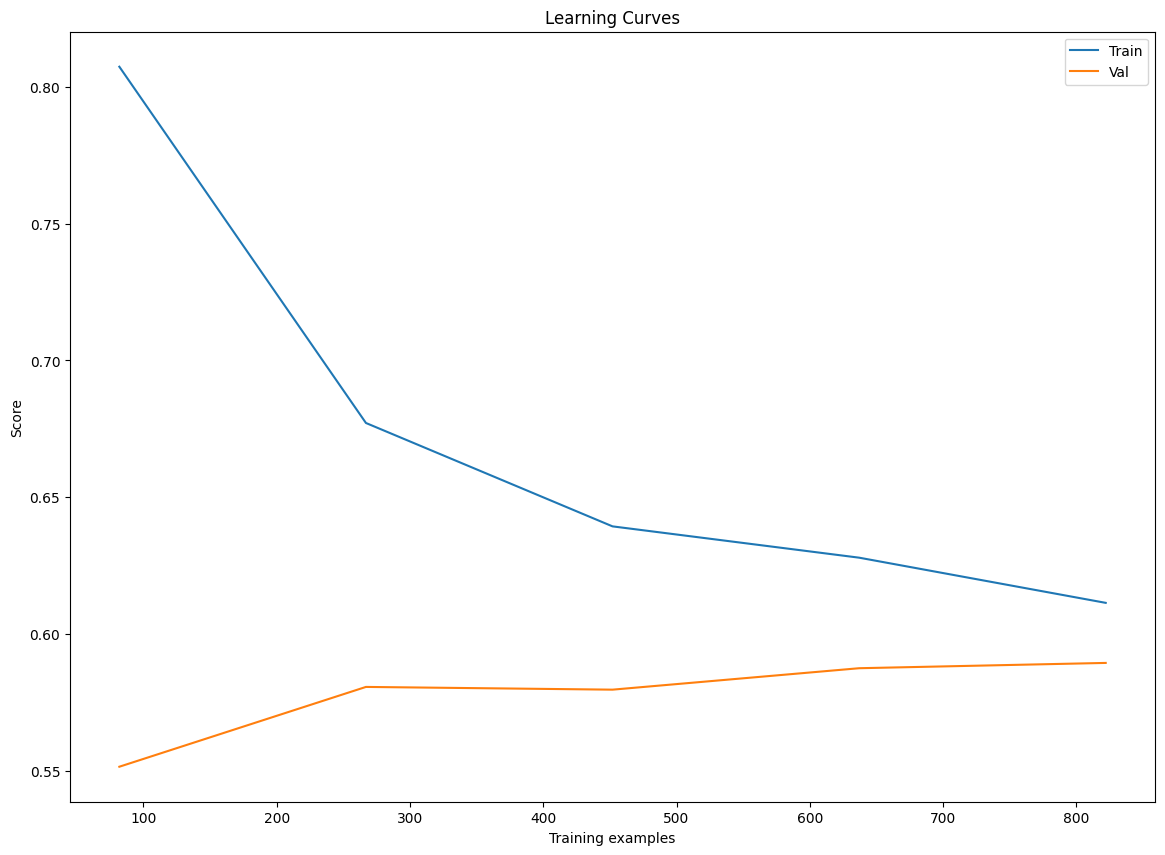

In [30]:
from sklearn.model_selection import GridSearchCV, learning_curve
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [20, 50, 100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3],
    'bootstrap': [True, False],
    'max_features': ['sqrt', 'log2'],
    'min_weight_fraction_leaf': [0.1, 0.5]
}

models = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')

models.fit(wine_data_train_prepared, wine_data_train_label)

# Print best params
print("Best params:", models.best_params_)

# Afficher la précision du meilleur modèle
print("Accuracy :", models.best_score_)

# Predict to have a full report
predictions = models.predict(wine_data_train_prepared)

# Report
report = classification_report(wine_data_train_label, predictions, zero_division=0.0)

# plot the report
print("Classification Report:\n", report)

# Learning curve
plt.figure(figsize=(14, 10))
train_sizes, train_scores, val_scores = learning_curve(models.best_estimator_, wine_data_train_prepared, wine_data_train_label, cv=5, n_jobs=-1)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = val_scores.mean(axis=1)
plt.plot(train_sizes, train_scores_mean, label = 'Train')
plt.plot(train_sizes, test_scores_mean, label = 'Val')

plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.show()

In [31]:
#Save the random forest
best_rf = RandomForestClassifier(**models.best_params_)
best_rf.fit(wine_data_train_prepared, wine_data_train_label)

RandomForestClassifier(bootstrap=False, max_features='log2',
                       min_weight_fraction_leaf=0.1, n_estimators=20)

# Try Logistic Regressiob

Best params: {'C': 0.1, 'penalty': 'l2'}
Accuracy : 0.5934359460099455
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        30
           5       0.67      0.76      0.71       434
           6       0.57      0.64      0.60       416
           7       0.57      0.29      0.39       129
           8       0.00      0.00      0.00        14

    accuracy                           0.61      1028
   macro avg       0.30      0.28      0.28      1028
weighted avg       0.58      0.61      0.59      1028



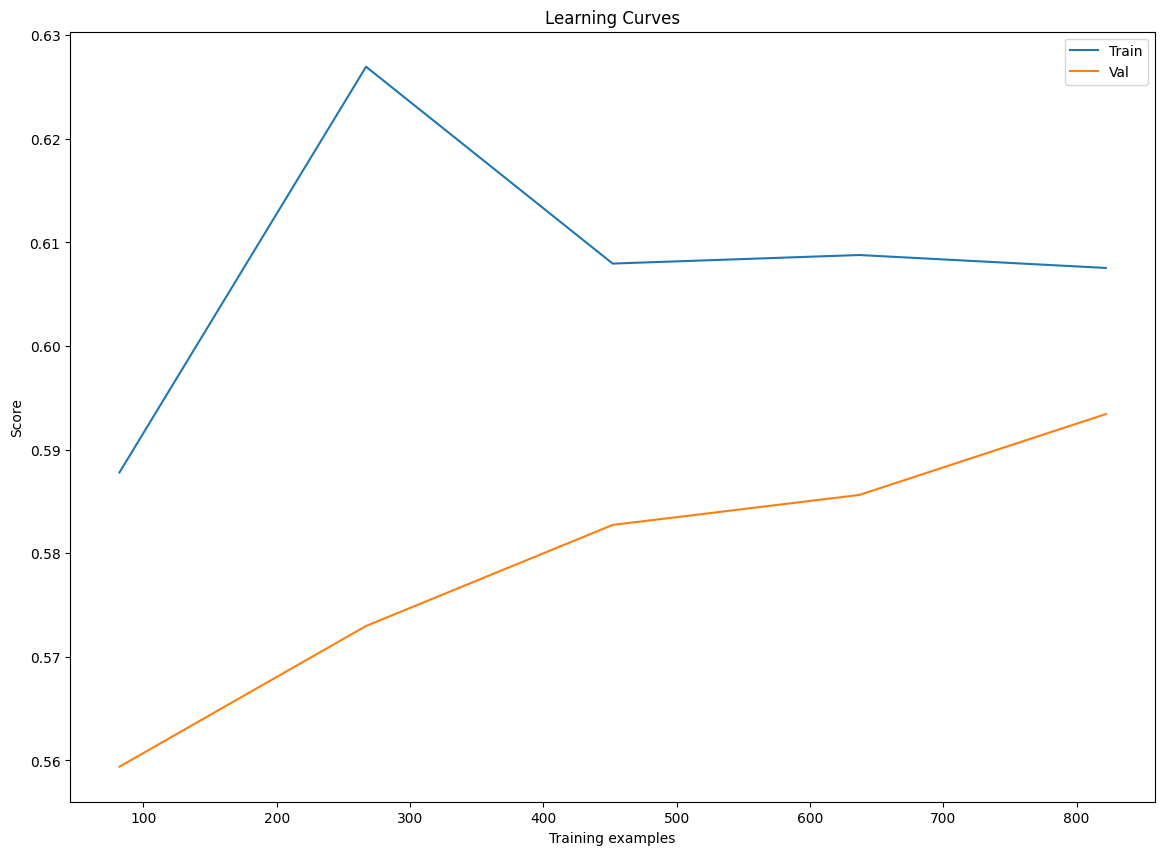

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2']
}


models = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5)
models.fit(wine_data_train_prepared, wine_data_train_label)

# Print best params
print("Best params:", models.best_params_)

# Afficher la précision du meilleur modèle
print("Accuracy :", models.best_score_)

# Predict to have a full report
predictions = models.predict(wine_data_train_prepared)

# Report
report = classification_report(wine_data_train_label, predictions, zero_division=0.0)

# plot the report
print("Classification Report:\n", report)

# Learning curves
plt.figure(figsize=(14, 10))
train_sizes, train_scores, val_scores = learning_curve(models.best_estimator_, wine_data_train_prepared, wine_data_train_label, cv=5, n_jobs=-1)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = val_scores.mean(axis=1)
plt.plot(train_sizes, train_scores_mean, label = 'Train')
plt.plot(train_sizes, test_scores_mean, label = 'Val')

plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.show()

In [33]:
best_logistic = LogisticRegression(**models.best_params_)

best_logistic.fit(wine_data_train_prepared, wine_data_train_label)

LogisticRegression(C=0.1)

# Try SVC

Best params: {'C': 0.1, 'coef0': 1.0, 'degree': 5, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy : 0.6284205541084538
Classification Report:
               precision    recall  f1-score   support

           3       1.00      0.80      0.89         5
           4       0.92      0.40      0.56        30
           5       0.78      0.82      0.80       434
           6       0.70      0.76      0.73       416
           7       0.83      0.61      0.71       129
           8       1.00      0.36      0.53        14

    accuracy                           0.75      1028
   macro avg       0.87      0.62      0.70      1028
weighted avg       0.76      0.75      0.75      1028



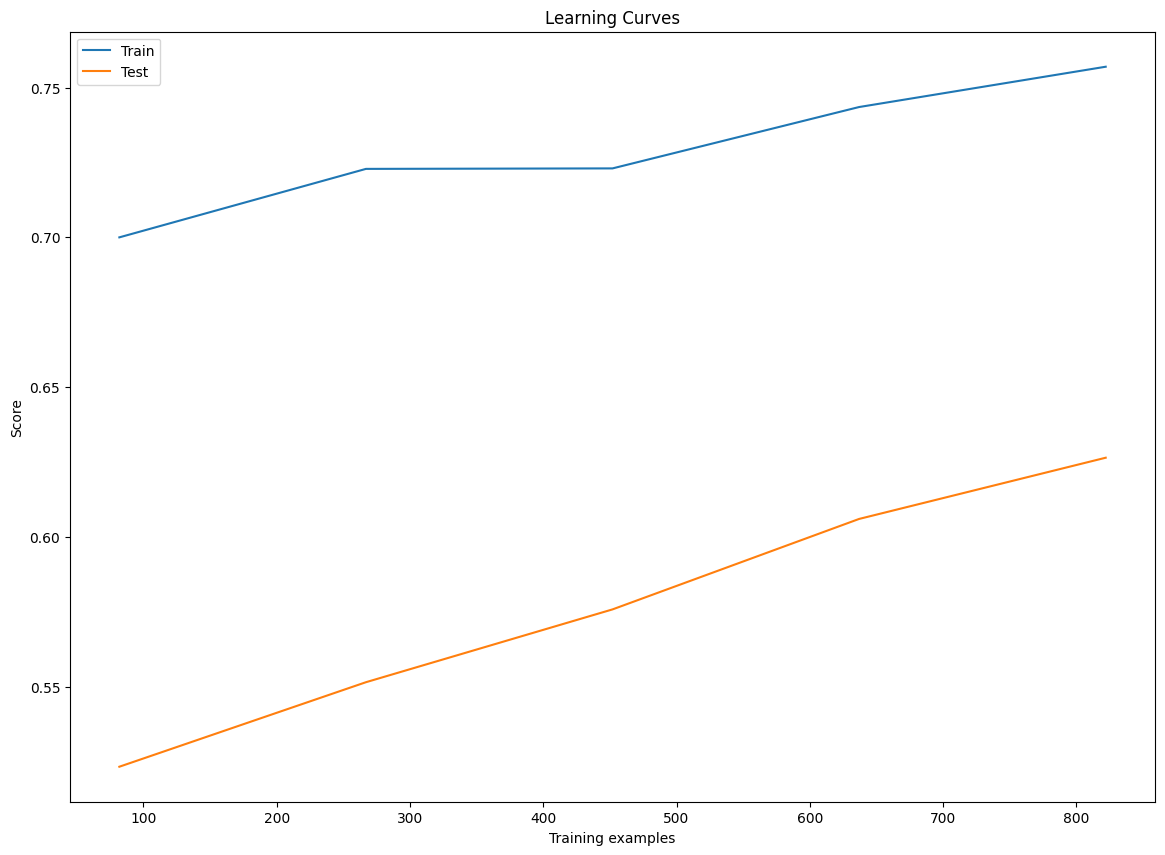

In [34]:
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC

param_grid_svc = {
    'C': [0.001, 0.01, 0.1],  # Valeurs plus larges pour C
    'gamma': ['scale', 'auto', 0.001],  # Valeurs plus larges pour gamma
    'kernel': ['linear', 'rbf', 'poly'],  # Ajout de différents noyaux
    'degree': [2, 3, 5],  # Pour le noyau polynomial
    'coef0': [0.0, 0.5, 1.0] # Pour le noyau polynomial et sigmoid
}


models = GridSearchCV(SVC(), param_grid_svc, cv=5, scoring = 'accuracy')

models.fit(wine_data_train_prepared, wine_data_train_label)

# Print best params
print("Best params:", models.best_params_)

# Afficher la précision du meilleur modèle
print("Accuracy :", models.best_score_)

# Predict to have a full report
predictions = models.predict(wine_data_train_prepared)

# Report
report = classification_report(wine_data_train_label, predictions, zero_division=0.0)

# plot the report
print("Classification Report:\n", report)

# Learning curves
plt.figure(figsize=(14, 10))
train_sizes, train_scores, test_scores = learning_curve(models, wine_data_train_prepared, wine_data_train_label, cv=5, n_jobs=-1)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)
plt.plot(train_sizes, train_scores_mean, label="Train")
plt.plot(train_sizes, test_scores_mean, label="Test")

plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.show()

In [35]:
best_svc = SVC(**models.best_params_)

best_svc.fit(wine_data_train_prepared, wine_data_train_label)

SVC(C=0.1, coef0=1.0, degree=5, kernel='poly')

# Voting Classifier

Cross validation accuracy: [0.61650485 0.59223301 0.58252427 0.6195122  0.61463415]
Scores average: 0.605081695477149


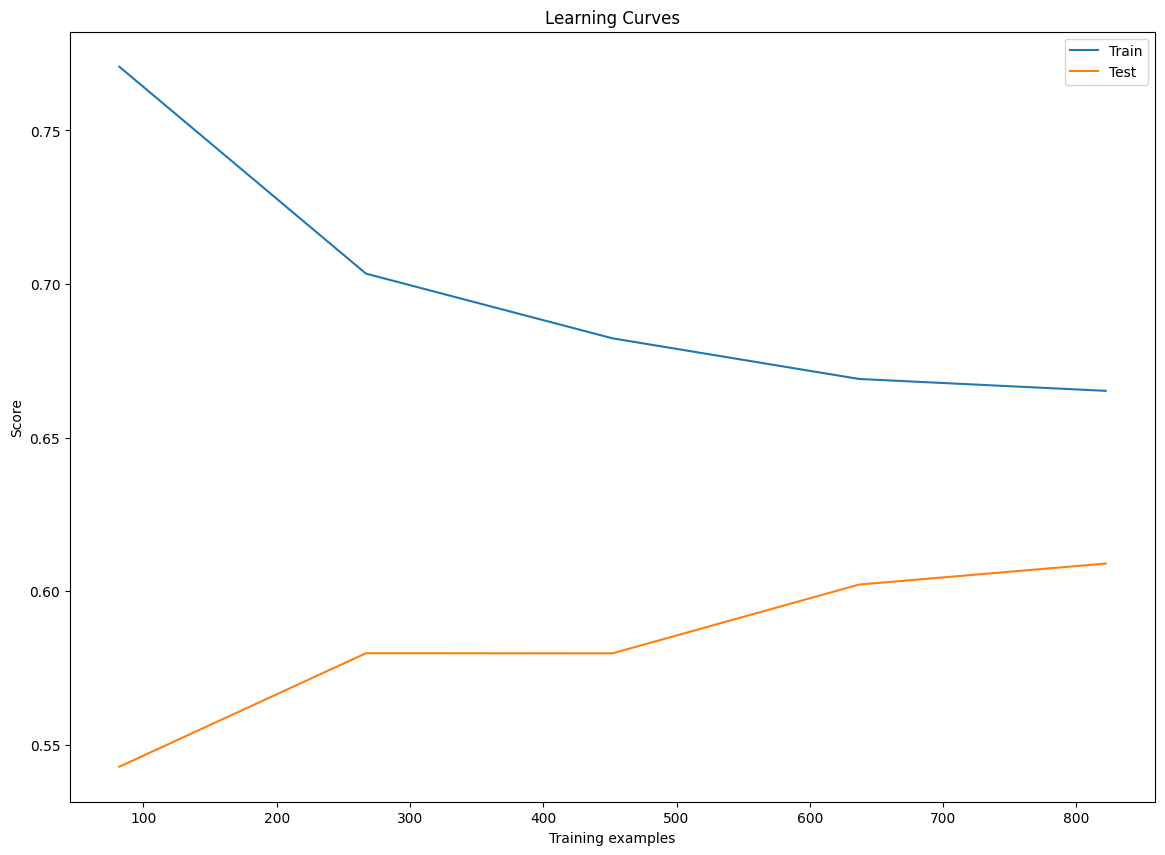

In [59]:
from sklearn.ensemble import VotingClassifier

models = [
    ('logistic_regression', best_logistic),
    ('random_forest', best_rf),
    ('decision_tree', best_decision_tree),
    ('SVC', best_svc)
]


voting_classifier = VotingClassifier(estimators=models, voting='hard')

from sklearn.model_selection import cross_val_score

scores = cross_val_score(voting_classifier, wine_data_train_prepared, wine_data_train_label, cv=5)

print("Cross validation accuracy:", scores)

# Afficher la moyenne des scores de validation croisée
print("Scores average:", scores.mean())


# Learning curve
plt.figure(figsize=(14, 10))
train_sizes, train_scores, test_scores = learning_curve(voting_classifier, wine_data_train_prepared, wine_data_train_label, cv=5, n_jobs=-1)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)
plt.plot(train_sizes, train_scores_mean, label="Train")
plt.plot(train_sizes, test_scores_mean, label="Test")

plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.show()

In [60]:
voting_classifier.fit(wine_data_train_prepared, wine_data_train_label)

VotingClassifier(estimators=[('logistic_regression', LogisticRegression(C=0.1)),
                             ('random_forest',
                              RandomForestClassifier(bootstrap=False,
                                                     min_samples_split=5,
                                                     min_weight_fraction_leaf=0.1,
                                                     n_estimators=50)),
                             ('decision_tree',
                              DecisionTreeClassifier(max_features='log2',
                                                     max_leaf_nodes=10,
                                                     min_samples_leaf=2,
                                                     min_samples_split=5)),
                             ('SVC',
                              SVC(C=0.1, coef0=1.0, degree=5, kernel='poly'))])

In [61]:
from sklearn.metrics import accuracy_score, classification_report

preparation_pipeline = Pipeline([
    ('outlier_replacer', ReplaceOutliers()),
    ('scaler', StandardScaler())
])

preparation_pipeline.fit(wine_data_train)

wine_data_test_prepared = preparation_pipeline.transform(wine_data_test)


y_pred = voting_classifier.predict(wine_data_test_prepared)

accuracy = accuracy_score(wine_data_test_label, y_pred)
print("Accuracy :", accuracy)

print("Classification Report:")
print(classification_report(wine_data_test_label, y_pred, zero_division=0))

Accuracy : 0.6695652173913044
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.74      0.86      0.79        49
           6       0.62      0.76      0.69        46
           7       0.00      0.00      0.00        14
           8       0.00      0.00      0.00         2

    accuracy                           0.67       115
   macro avg       0.23      0.27      0.25       115
weighted avg       0.56      0.67      0.61       115



But it looks like the model can predict only class 5 or 6

# Save model

In [62]:
import joblib

# Save model
joblib.dump(voting_classifier, 'voting_classifier_model_wine_quality.pkl')

['voting_classifier_model_wine_quality.pkl']

In [ ]:
import joblib

loaded_model = joblib.load('voting_classifier_model_wine_quality.pkl')

# Conclusion

So to sum up. In this project I've explore a wine quality dataset downloaded with Kaggle.
I've preprocessed the data (cleaning, standardization) in order to train different models.

I've tried a Decision Tree, a Random Forest, a Logistic Regression and a SVC model. I also tried XGBoost, Gradient Boosting and KNN but I've more or less the same accuracy but more training time.

All of these models overfit quickly or have bad performance so I've decided to put them all together inside a voting classifier.

To improve these models, I've a lot of other parameters to explore and I can probably do a better fine tuning. I could have tried a neural network too.